Math 5750/6880: Mathematics of Data Science \
Project 2

# 1. Clustering Gaussian Blobs using $k$-means

In [17]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate 5 Gaussian blobs in 10 dimensions
X, y_true = make_blobs(
    n_samples=1000,
    centers=5,
    n_features=10,
    cluster_std=1.5,
    random_state=1)        # reproducibility
X = StandardScaler().fit_transform(X)

print(type(X),X.shape)
print(type(y_true),y_true.shape)

<class 'numpy.ndarray'> (1000, 10)
<class 'numpy.ndarray'> (1000,)


report smallest k-means inertia value, 2d visualization via PCA, confusion matrix, elbow analysis

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=5).fit(X)
y_pred = kmeans.labels_ # labels of each point
# Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided
inertia_k5 = kmeans.inertia_

print(f"smallest k means inertia for k=5:  {inertia_k5:.3f}\n")

smallest k means inertia for k=5:  924.316



In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)
centers_pca = pca.transform(kmeans.cluster_centers_)

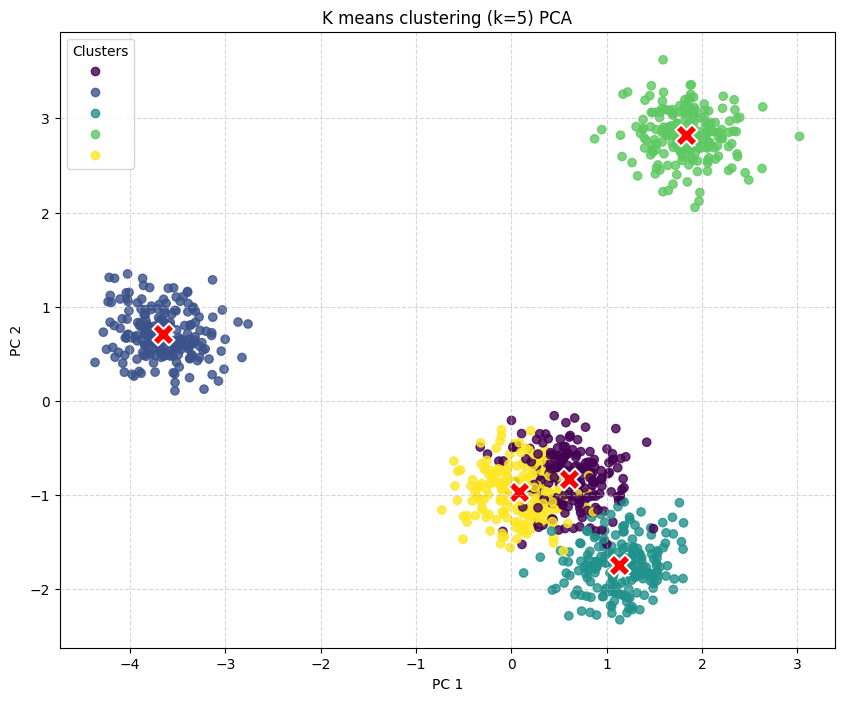

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=y_pred,
    cmap='viridis',
    alpha=0.8,
    # edgecolors='k',
    linewidth=1
)

plt.scatter(
    centers_pca[:, 0],
    centers_pca[:, 1],
    c='red',
    # alpha=0.1,
    marker='X',
    s=250,
    edgecolors='white',
    linewidth=1.5,
    label='Cluster Centers'
)

plt.title('K means clustering (k=5) PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(handles=scatter.legend_elements()[0], title='Clusters')
plt.grid(True, linestyle='--', alpha=0.5)

Text(95.72222222222221, 0.5, 'True label')

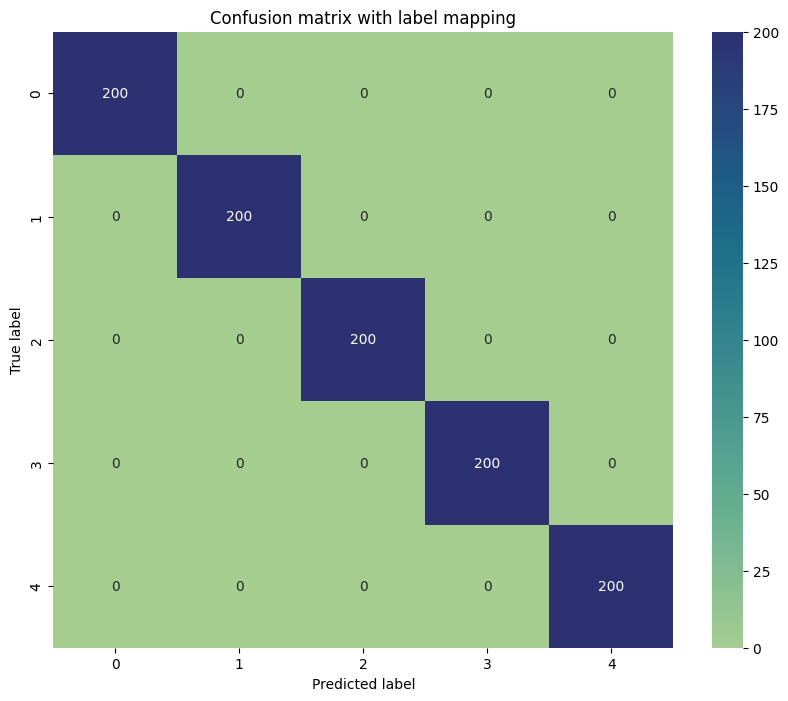

In [21]:
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
import seaborn as sns

cm_unmapped = confusion_matrix(y_true, y_pred)
rows, cols = linear_sum_assignment(-cm_unmapped)
label_mapping = {cols[i]: rows[i] for i in range(len(cols))}
y_pred_mapped = np.array([label_mapping[label] for label in y_pred])
cm_mapped = confusion_matrix(y_true, y_pred_mapped)

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm_mapped,
    annot=True,
    fmt='d',
    cmap='crest',
    xticklabels=range(5),
    yticklabels=range(5)
)
plt.title('Confusion matrix with label mapping')
plt.xlabel('Predicted label')
plt.ylabel('True label')

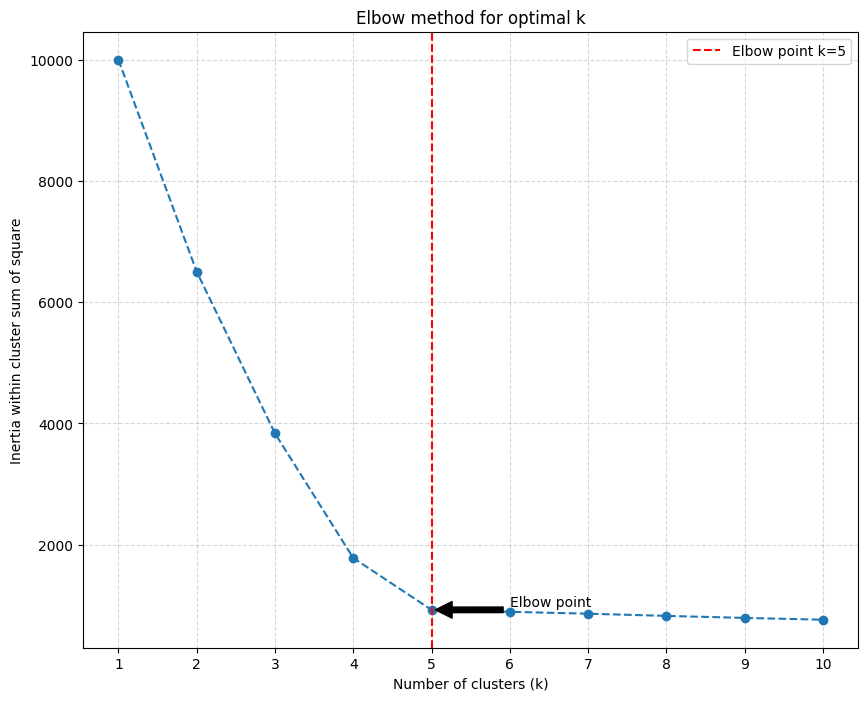

In [24]:
# elbow analysis

inertia_values = []
k_range = range(1, 11)

for k in k_range:
  kmeans_elbow = KMeans(n_clusters=k, random_state=42)
  kmeans_elbow.fit(X)
  inertia_values.append(kmeans_elbow.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(k_range, inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia within cluster sum of square')
plt.title('Elbow method for optimal k')
plt.xticks(k_range)
plt.axvline(x=5, color='red', linestyle='--', label='Elbow point k=5')
plt.annotate('Elbow point', xy=(5, inertia_values[4]), xytext=(6, inertia_values[4] + 50),
                                arrowprops=dict(facecolor='black', shrink=0.05))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# 2. Clustering Fashion-MNIST using $k$-means

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST from OpenML
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)

print(type(X),X.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (70000, 784)
<class 'numpy.ndarray'> (70000,)


In [ ]:
# your code here

# 3. Dimensionality reduction for Fashion-MNIST

In [ ]:
# your code here

# 4. Clustering Fashion-MNIST using spectral clustering

In [ ]:
# your code here